In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from PIL import Image
import plotly.graph_objs as go
from plotly import tools

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from plotly.offline import init_notebook_mode,iplot
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob, Word, Blobber


In [5]:
### Read text files

star_war4 = pd.read_csv('C:/Users/Maximus/Desktop/lab 4 assignment/lab 4 assignment/star_wars_movies_scripts/SW_EpisodeIV.txt', delim_whitespace=True, names=["index","character","dialogue"] ,header = None, on_bad_lines='skip')
star_war5 = pd.read_csv('C:/Users/Maximus/Desktop/lab 4 assignment/lab 4 assignment/star_wars_movies_scripts/SW_EpisodeV.txt', delim_whitespace=True, names=["index","character","dialogue"] ,header = None, on_bad_lines='skip')
star_war6 = pd.read_csv('C:/Users/Maximus/Desktop/lab 4 assignment/lab 4 assignment/star_wars_movies_scripts/SW_EpisodeVI.txt', delim_whitespace=True, names=["index","character","dialogue"] ,header = None, on_bad_lines='skip')

In [6]:
star_war4.drop(0,inplace=True)
star_war5.drop(0,inplace=True)
star_war6.drop(0,inplace=True)
star_war4.drop(["index"],axis=1,inplace=True)
star_war5.drop(["index"],axis=1,inplace=True)
star_war6.drop(["index"],axis=1,inplace=True)

In [7]:
star_war4

,character,dialogue
1,THREEPIO,Did you hear that? They've shut down the main...
2,THREEPIO,We're doomed!
3,THREEPIO,There'll be no escape for the Princess this time.
4,THREEPIO,What's that?
5,THREEPIO,I should have known better than to trust the l...
...,...,...
1005,LUKE,"Oh, no!"
1006,THREEPIO,"Oh, my! Artoo! Can you hear me? Say somethi..."
1007,TECHNICIAN,We'll get to work on him right away.
1008,THREEPIO,"You must repair him! Sir, if any of my circui..."


In [24]:
star_war5

,character,dialogue
1,LUKE,"Echo Three to Echo Seven. Han, old buddy, do y..."
2,HAN,"Loud and clear, kid. What's up?"
3,LUKE,"Well, I finished my circle. I don't pick up an..."
4,HAN,There isn't enough life on this ice cube to fi...
5,LUKE,Right. I'll see you shortly. There's a meteori...
...,...,...
834,LUKE,I'll meet you at the rendezvous point on Tato...
835,LANDO,"Princess, we'll find Han. I promise."
836,LUKE,"Chewie, I'll be waiting for your signal."
837,LUKE,"Take care, you two. May the Force be with you."


In [25]:
star_war6

,character,dialogue
1,SHUTTLE CAPTAIN,"Command station, this is ST 321. Code Clearanc..."
2,DEATH STAR CONTROLLER,The security deflector shield will be deactiva...
3,SHUTTLE CAPTAIN,We're starting our approach.
4,OFFICER,Inform the commander that Lord Vader's shuttle...
5,OPERATOR,"Yes, sir."
...,...,...
668,LANDO,"Wedge, I don't think we're going to make it."
669,WEDGE,You'll make it. Just follow me Gold Leader.
670,LANDO,I promised to return his ship without a scratc...
671,HAN,Lando...


## Question 1: Find the characters with most dialogue in each of The Original Trilogy (Episodes IV, V, VI).

In [26]:
top_chrctr_epi4 = pd.DataFrame(star_war4.character.value_counts()).iloc[:10]
top_chrctr_epi5 = pd.DataFrame(star_war5.character.value_counts()).iloc[:10]
top_chrctr_epi6 = pd.DataFrame(star_war6.character.value_counts()).iloc[:10]

In [27]:
top_chrctr_epi4

,character
LUKE,254
HAN,153
THREEPIO,118
BEN,82
LEIA,57
VADER,41
RED LEADER,37
BIGGS,34
TARKIN,28
OWEN,25


In [28]:
top_chrctr_epi5

,character
HAN,181
LUKE,128
LEIA,114
THREEPIO,92
LANDO,61
VADER,56
YODA,36
PIETT,23
CREATURE,21
BEN,15


In [29]:
top_chrctr_epi6

,character
HAN,124
LUKE,112
THREEPIO,89
LEIA,55
VADER,43
LANDO,40
EMPEROR,39
JABBA,20
BEN,18
ACKBAR,14


Question 2: Plot the number of dialogues according to the character for each episode (i.e. 
plot the above findings).

In [52]:
fig_1 = px.bar(top_chrctr_epi4, x=top_chrctr_epi4.index, y=top_chrctr_epi4.character, title='Top 10 characters in Episode IV')
fig_1.update_traces(marker_color='green')

fig_1.update_layout(
        title_text='The original Trilogy Episode IV - Top 10 Characters',xaxis_title="Characters",
    yaxis_title="Number of dialogues", 
)
fig_1.show()


In [53]:
fig_2 = px.bar(top_chrctr_epi5, x=top_chrctr_epi5.index, y=top_chrctr_epi5.character)
fig_2.update_traces(marker_color='green')
fig_2.update_layout(
        title_text='The original Trilogy Episode V - Top 10 Characters',xaxis_title="Characters",
    yaxis_title="Number of dialogues",
)
fig_2.show()

In [48]:
fig_3 = px.bar(top_chrctr_epi6, x=top_chrctr_epi6.index, y=top_chrctr_epi6.character)
fig_3.update_traces(marker_color='green')
fig_3.update_layout(
        title_text='The original Trilogy Episode VI - Top Characters',xaxis_title="Characters",
    yaxis_title="Number of dialogues",
)
fig_3.show()

## Question 3: Add a new column “episode” to the three datasets (to distinguish between the three episodes) and concatenate them into one dataset.

In [54]:
star_war4["episode"]="A New Hope"
star_war4

,character,dialogue,episode
1,THREEPIO,Did you hear that? They've shut down the main...,A New Hope
2,THREEPIO,We're doomed!,A New Hope
3,THREEPIO,There'll be no escape for the Princess this time.,A New Hope
4,THREEPIO,What's that?,A New Hope
5,THREEPIO,I should have known better than to trust the l...,A New Hope
...,...,...,...
1005,LUKE,"Oh, no!",A New Hope
1006,THREEPIO,"Oh, my! Artoo! Can you hear me? Say somethi...",A New Hope
1007,TECHNICIAN,We'll get to work on him right away.,A New Hope
1008,THREEPIO,"You must repair him! Sir, if any of my circui...",A New Hope


In [55]:
star_war5["episode"]="The Empire Strikes Back"
star_war5

,character,dialogue,episode
1,LUKE,"Echo Three to Echo Seven. Han, old buddy, do y...",The Empire Strikes Back
2,HAN,"Loud and clear, kid. What's up?",The Empire Strikes Back
3,LUKE,"Well, I finished my circle. I don't pick up an...",The Empire Strikes Back
4,HAN,There isn't enough life on this ice cube to fi...,The Empire Strikes Back
5,LUKE,Right. I'll see you shortly. There's a meteori...,The Empire Strikes Back
...,...,...,...
834,LUKE,I'll meet you at the rendezvous point on Tato...,The Empire Strikes Back
835,LANDO,"Princess, we'll find Han. I promise.",The Empire Strikes Back
836,LUKE,"Chewie, I'll be waiting for your signal.",The Empire Strikes Back
837,LUKE,"Take care, you two. May the Force be with you.",The Empire Strikes Back


In [56]:
star_war6["episode"]="Return of The Jedi"
star_war6

,character,dialogue,episode
1,SHUTTLE CAPTAIN,"Command station, this is ST 321. Code Clearanc...",Return of The Jedi
2,DEATH STAR CONTROLLER,The security deflector shield will be deactiva...,Return of The Jedi
3,SHUTTLE CAPTAIN,We're starting our approach.,Return of The Jedi
4,OFFICER,Inform the commander that Lord Vader's shuttle...,Return of The Jedi
5,OPERATOR,"Yes, sir.",Return of The Jedi
...,...,...,...
668,LANDO,"Wedge, I don't think we're going to make it.",Return of The Jedi
669,WEDGE,You'll make it. Just follow me Gold Leader.,Return of The Jedi
670,LANDO,I promised to return his ship without a scratc...,Return of The Jedi
671,HAN,Lando...,Return of The Jedi


In [57]:
Scripts=pd.concat([star_war4,star_war5,star_war6],axis=0,ignore_index=True)

In [62]:
Scripts

,character,dialogue,episode
0,THREEPIO,Did you hear that? They've shut down the main...,A New Hope
1,THREEPIO,We're doomed!,A New Hope
2,THREEPIO,There'll be no escape for the Princess this time.,A New Hope
3,THREEPIO,What's that?,A New Hope
4,THREEPIO,I should have known better than to trust the l...,A New Hope
...,...,...,...
2514,LANDO,"Wedge, I don't think we're going to make it.",Return of The Jedi
2515,WEDGE,You'll make it. Just follow me Gold Leader.,Return of The Jedi
2516,LANDO,I promised to return his ship without a scratc...,Return of The Jedi
2517,HAN,Lando...,Return of The Jedi


In [58]:
len(Scripts.dialogue)

2519

In [59]:
len(Scripts.character.unique())

129

In [60]:
script_concat = pd.DataFrame(Scripts.character.value_counts()).iloc[:20]
script_concat

,character
LUKE,494
HAN,458
THREEPIO,299
LEIA,226
VADER,140
BEN,115
LANDO,101
YODA,49
EMPEROR,44
RED LEADER,38


## Question 4: Discover the Frequency Distribution of words in The Original Trilogy.

In [66]:
most_used_words = Scripts["dialogue"].str.split(expand=True).stack().value_counts().head(20)
most_used_words

the     792
I       662
to      636
you     561
a       415
of      342
your    242
is      238
be      229
have    199
in      199
and     185
for     179
You     175
I'm     168
that    158
are     155
my      154
this    150
will    148
dtype: int64

## Question 5: Create a Frequency Distribution plot of the most repeated words in The Original Trilogy.

In [73]:
# Plotting the most used words in the trilogy
fig_4 = px.bar(most_used_words, x=most_used_words.index, y=most_used_words)
fig_4.update_traces(marker_color='green')
fig_4.update_layout(
        title_text='The original Trilogy - Top 20 most used words',xaxis_title="Words",
    yaxis_title="Number of times used",
)
fig_4.show()


## Question 6 : Perform text-mining operations to prepare your dataset for further text analysis. (Use the NLTK library)
#### a. Convert to lower case, word tokenization, removing stopwords, lexicon normalization (lemmatization), etc.

In [74]:
import re
import nltk
from nltk.corpus import stopwords
import nltk as nlp
from wordcloud import WordCloud,STOPWORDS
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maximus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maximus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Maximus\AppData\Roaming\nltk_data...


True

In [30]:
#pip installing of wordcloud

In [75]:
description_list=[]
for description in Scripts.dialogue:
    description=re.sub("[^a-zA-Z]", " ", description)
    description=description.lower()
    description=nltk.word_tokenize(description)
    description=[word for word in description if not word in set(stopwords.words("english"))]
    lemma=nlp.WordNetLemmatizer()
    description=[lemma.lemmatize(word) for word in description]
    description=" ".join(description)
    description_list.append(description)

### b. Adding the resulting array list to the dataset as a new column, “new_script”.

In [76]:
Scripts["new_script"]=description_list
Scripts

,character,dialogue,episode,new_script
0,THREEPIO,Did you hear that? They've shut down the main...,A New Hope,hear shut main reactor destroyed sure madness
1,THREEPIO,We're doomed!,A New Hope,doomed
2,THREEPIO,There'll be no escape for the Princess this time.,A New Hope,escape princess time
3,THREEPIO,What's that?,A New Hope,
4,THREEPIO,I should have known better than to trust the l...,A New Hope,known better trust logic half sized thermocaps...
...,...,...,...,...
2514,LANDO,"Wedge, I don't think we're going to make it.",Return of The Jedi,wedge think going make
2515,WEDGE,You'll make it. Just follow me Gold Leader.,Return of The Jedi,make follow gold leader
2516,LANDO,I promised to return his ship without a scratc...,Return of The Jedi,promised return ship without scratch sure hope...
2517,HAN,Lando...,Return of The Jedi,lando


## Question 7: frequency distribution of the “new_script” 

In [77]:
#checking top 10 words
def frequency(corpus, n = None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = frequency(Scripts['new_script'])
df_freq = pd.DataFrame(common_words, columns = ['Word', 'count'])
df_freq_dialogue = df_freq.head(15)
df_freq_dialogue 


,Word,count
0,luke,137
1,get,130
2,going,121
3,come,113
4,right,113
5,oh,113
6,know,110
7,see,95
8,well,92
9,sir,90


In [81]:
# Plot the most frequent words
fig_5 = px.bar(df_freq_dialogue, x=df_freq_dialogue.Word, y=df_freq_dialogue['count'])
fig_5.update_traces(marker_color='green')
fig_5.update_layout(
        title_text='The original Trilogy - Top 15 most used words in new script',xaxis_title="Words",
    yaxis_title="Number of times used",
)
fig_5.show()


## Question 8: Word Clouds of Darth Vader and Yoda.

In [82]:
luke=Scripts[Scripts.character=="LUKE"]
yoda=Scripts[Scripts.character=="YODA"]
han=Scripts[Scripts.character=="HAN"]
vader=Scripts[Scripts.character=="VADER"]

In [83]:
wave_mask_yoda = np.array(Image.open("C:/Users/Maximus/Desktop/lab 4 assignment/lab 4 assignment/wordcloud_masks/yoda.png"))
wave_mask_vader= np.array(Image.open("C:/Users/Maximus/Desktop/lab 4 assignment/lab 4 assignment/wordcloud_masks/vader.jpg"))

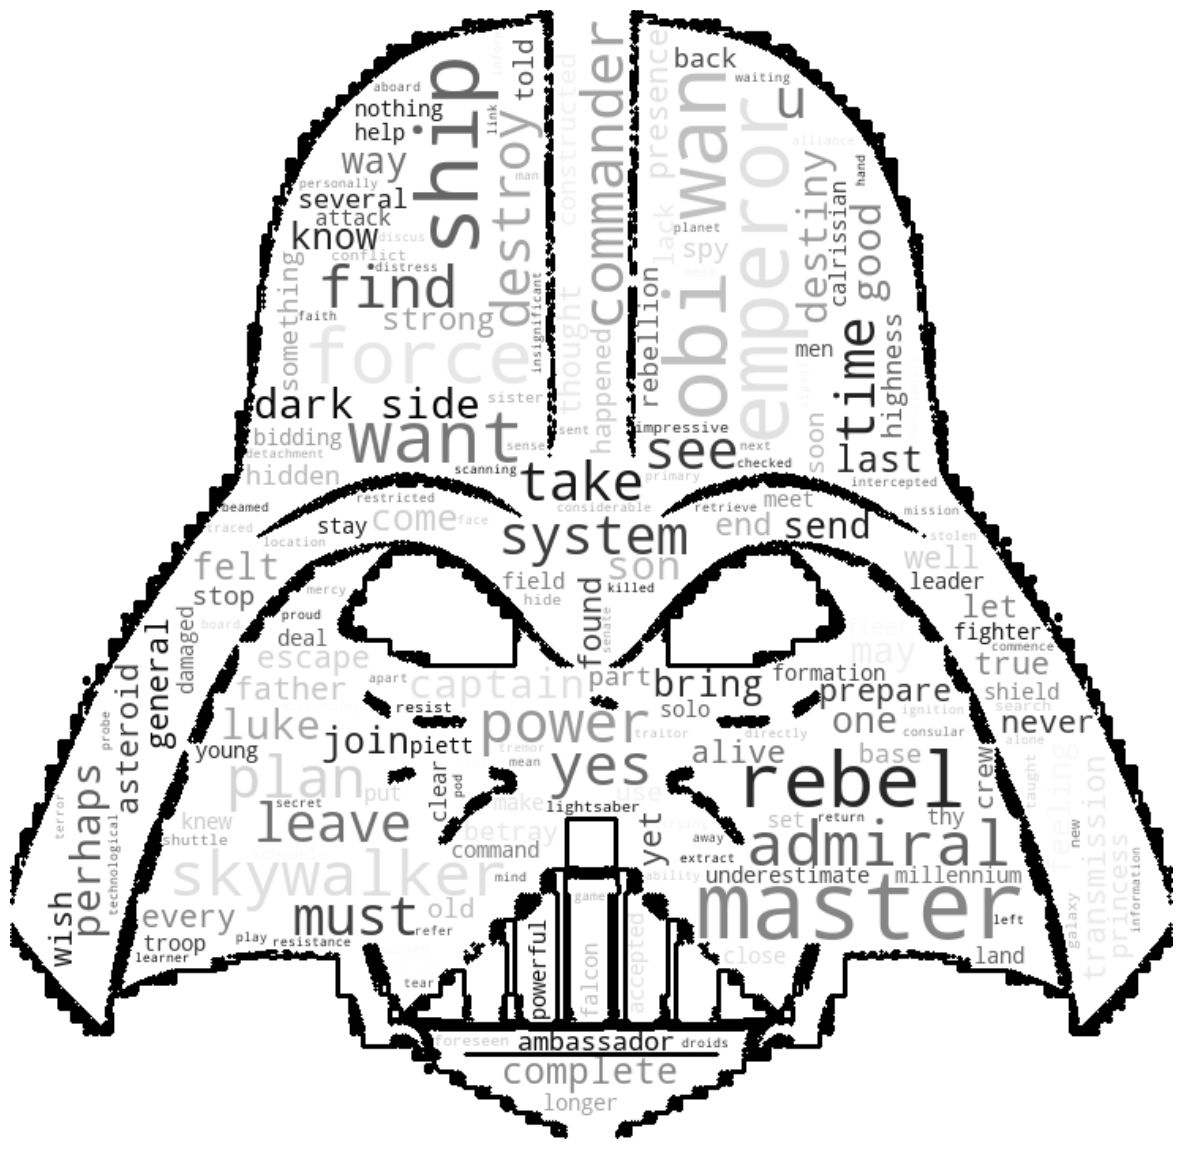

In [90]:
plt.subplots(figsize=(15,15))
stopwords= set(STOPWORDS)
wordcloud = WordCloud(mask=wave_mask_vader,background_color="white",colormap="gray" ,contour_width=2, contour_color="black",
                      width=950,
                          height=950
                         ).generate(" ".join(vader.new_script))

plt.imshow(wordcloud ,interpolation='bilinear')
plt.axis('off')
plt.savefig('vader_graph.png')

plt.show()


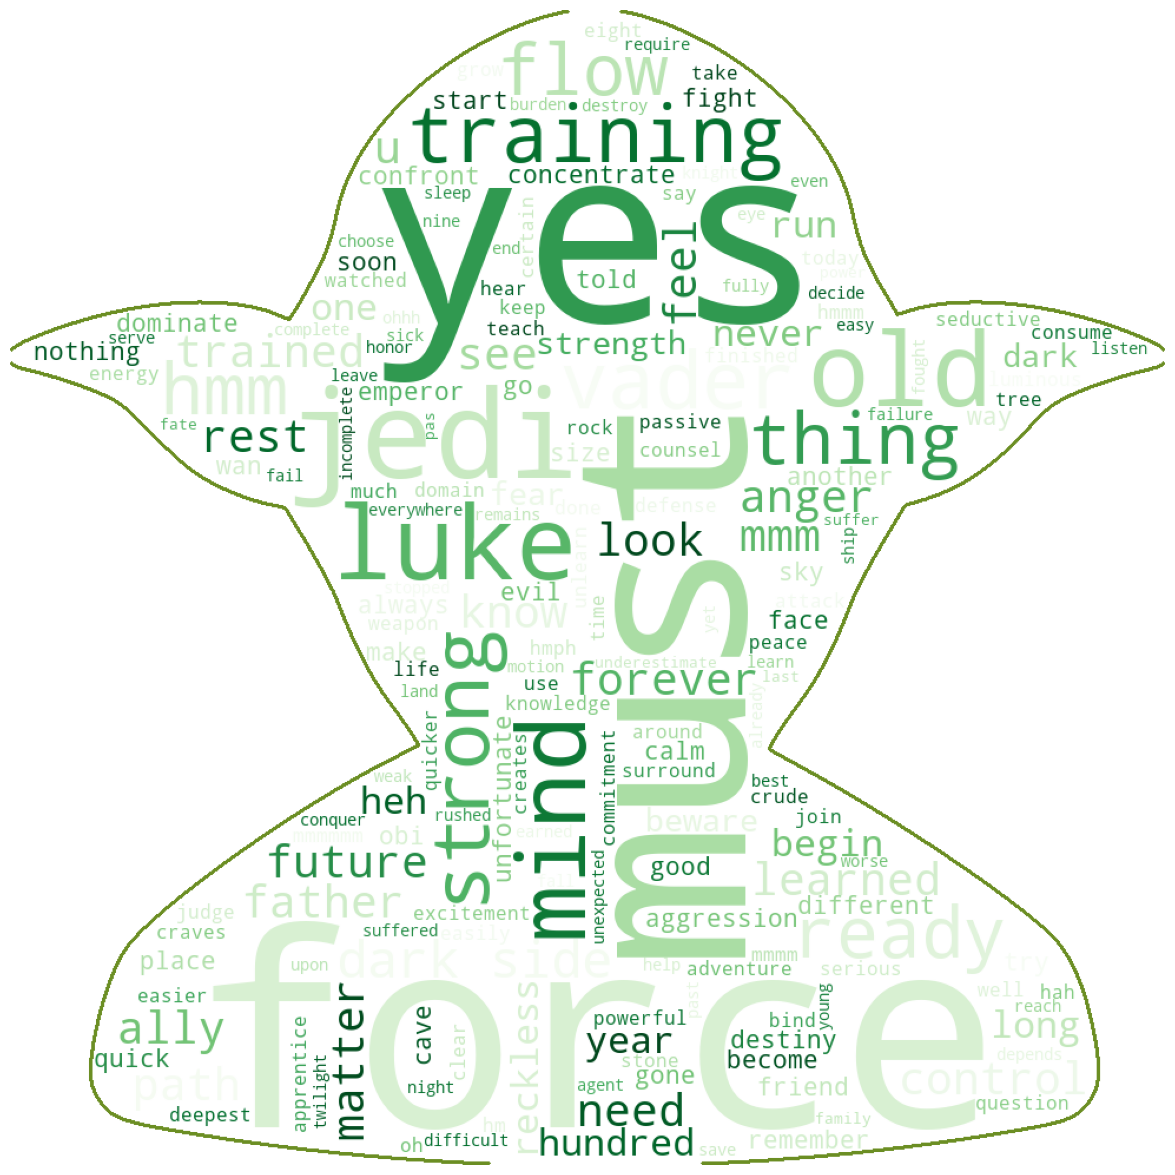

In [89]:
plt.subplots(figsize=(15,15))
stopwords= set(STOPWORDS)
wordcloud = WordCloud(mask=wave_mask_yoda,background_color="white",contour_width=3, contour_color="olivedrab",colormap="Greens",
                      stopwords=stopwords,   
                      width=950,
                          height=950
                         ).generate(" ".join(yoda.new_script))

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('yoda_graph.png')

plt.show()

## Question 9: Most relevant words in The Original Trilogy script

In [118]:
from sklearn.feature_extraction.text import CountVectorizer 

max_features = 200

count_vectorizer = CountVectorizer(max_features=max_features, stop_words="english")

sparse_matrix = count_vectorizer.fit_transform(description_list).toarray()

print("Most relevant {} words: {}".format(max_features, count_vectorizer.get_feature_names_out()))


Most relevant 200 words: ['admiral' 'afraid' 'alderaan' 'artoo' 'attack' 'away' 'bad' 'base'
 'battle' 'believe' 'ben' 'better' 'big' 'blast' 'boy' 'bring' 'came'
 'captain' 'care' 'chewie' 'clear' 'close' 'code' 'come' 'coming'
 'command' 'commander' 'computer' 'control' 'copy' 'course' 'dangerous'
 'dark' 'dead' 'death' 'destiny' 'destroy' 'die' 'door' 'droid' 'droids'
 'easy' 'emperor' 'empire' 'end' 'escape' 'far' 'father' 'fault' 'feel'
 'feeling' 'field' 'fight' 'fighter' 'fleet' 'force' 'friend' 'general'
 'getting' 'going' 'gold' 'gon' 'gone' 'good' 'got' 'great' 'group' 'han'
 'hand' 'happened' 'hear' 'help' 'hey' 'hit' 'hold' 'hope' 'hurry'
 'imperial' 'jabba' 'jedi' 'kenobi' 'kid' 'knew' 'know' 'lando' 'leader'
 'leave' 'left' 'leia' 'let' 'life' 'light' 'like' 'listen' 'little'
 'long' 'look' 'looking' 'lord' 'lost' 'lot' 'luke' 'main' 'make' 'man'
 'master' 'mean' 'mind' 'minute' 'moon' 'na' 'need' 'new' 'obi' 'oh'
 'okay' 'old' 'owen' 'pay' 'people' 'place' 'plan' 'planet

In [119]:
from sklearn.feature_extraction.text import CountVectorizer 

max_features = 200

count_vectorizer = CountVectorizer(max_features=max_features, stop_words="english")

sparse_matrix = count_vectorizer.fit_transform(description_list).toarray()

feature_names = count_vectorizer.get_feature_names_out()

# Create a DataFrame with the feature names
features_rep = pd.DataFrame({'Word': feature_names})

# Display the DataFrame
print(features_rep)


         Word
0     admiral
1      afraid
2    alderaan
3       artoo
4      attack
..        ...
195     wrong
196      yeah
197       yes
198      yoda
199     young

[200 rows x 1 columns]


## Question 10: sentiment analysis on the movie scripts

In [120]:
def polarity(text):
    blob = TextBlob(text)
    return blob.polarity

def label(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        result = 'positive'
    elif blob.polarity < 0:
        result = 'negative'
    else:
        result = 'neutral'
    return result

In [121]:
#Checking sentiment score of ep4
star_war4['polarity'] = star_war4['dialogue'].apply(polarity)
star_war4['label'] = star_war4['dialogue'].apply(label)

#review count the basis of labels: negative, positive or neutral
star_war4['label'].value_counts()

neutral     564
positive    275
negative    170
Name: label, dtype: int64

In [122]:
#Checking sentiment score of ep5
star_war5['polarity'] = star_war5['dialogue'].apply(polarity)
star_war5['label'] = star_war5['dialogue'].apply(label)

#review count the basis of labels: negative, positive or neutral
star_war5['label'].value_counts()

neutral     489
positive    213
negative    136
Name: label, dtype: int64

In [123]:
#Checking sentiment score of ep6
star_war6['polarity'] = star_war6['dialogue'].apply(polarity)
star_war6['label'] = star_war6['dialogue'].apply(label)

#review count the basis of labels: negative, positive or neutral
star_war6['label'].value_counts()

neutral     398
positive    187
negative     87
Name: label, dtype: int64

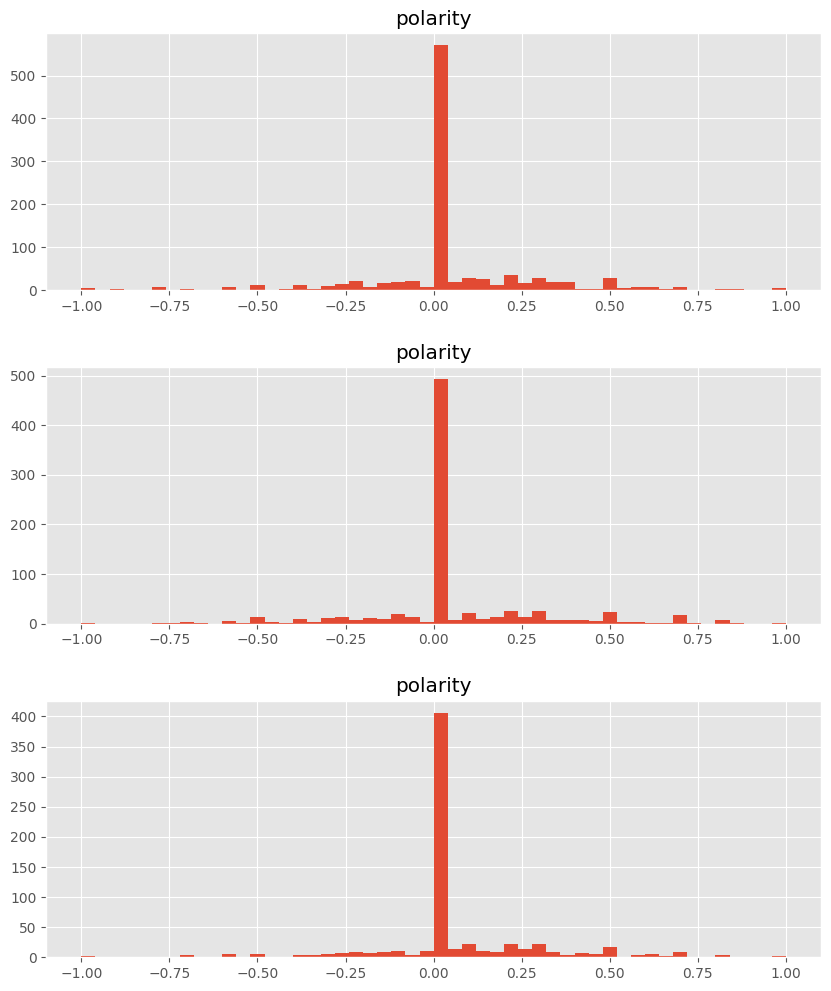

In [127]:
fig, axes = plt.subplots(3, figsize=(10, 12))

star_war4.hist('polarity', bins=50, ax=axes[0])
star_war5.hist('polarity', bins=50, ax=axes[1])
star_war6.hist('polarity', bins=50, ax=axes[2])

plt.show()
